In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [186]:
df  = pd.read_csv(r"C:\Users\DELL\Documents\ramendra python files\Data\bollywood.csv")

In [187]:
df



,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [189]:
df["Year_of_Release"] = df["Release Date"].apply(lambda x:x.split("-")[2])

In [190]:
df["Month_of_Release"] = df["Release Date"].apply(lambda x:x.split("-")[1])

In [191]:
df["Day_of_Release"] = df["Release Date"].apply(lambda x:x.split("-")[0])

In [192]:
df.drop("Release Date", inplace = True, axis = 1)

In [193]:
df

,SlNo,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year_of_Release,Month_of_Release,Day_of_Release
0,1,2 States,LW,Romance,36,104.00,8576361,26622,2527,14,Apr,18
1,2,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,13,Jan,4
2,3,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,14,Jul,18
3,4,Rajdhani Express,N,Drama,7,0.35,42626,86,19,13,Jan,4
4,5,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,14,Jul,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,15,Feb,27
145,146,NH10,N,Thriller,13,32.10,5592977,15464,1513,15,Mar,13
146,147,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,15,Mar,20
147,148,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,15,Mar,20


<AxesSubplot:>

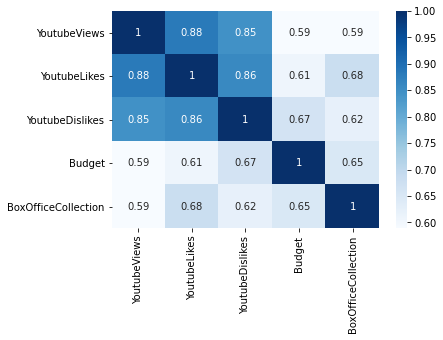

In [194]:
sns.heatmap(df[["YoutubeViews","YoutubeLikes","YoutubeDislikes","Budget","BoxOfficeCollection"]].corr(), annot = True, cmap = "Blues")

In [195]:
df.groupby("Month_of_Release").mean().sort_values(by = "BoxOfficeCollection", ascending=False )["BoxOfficeCollection"]

Month_of_Release
Dec    396.225000
Aug    125.787500
Oct    103.000000
Sep     73.710000
Jun     54.858000
Jul     52.969375
Nov     47.360000
Apr     42.500000
May     41.387778
Feb     40.006250
Jan     33.648500
Mar     22.964737
Name: BoxOfficeCollection, dtype: float64

In [196]:
df.groupby("Month_of_Release").agg(["mean","count"])["BoxOfficeCollection"].index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month_of_Release')

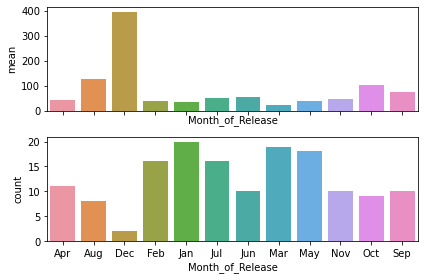

In [197]:
# plt.figure(figsize=(25,5))
fig, axes = plt.subplots(2,1,sharex=True)
ax = sns.barplot(x=df.groupby("Month_of_Release").agg(["mean","count"])["BoxOfficeCollection"].index,y=df.groupby("Month_of_Release").agg(["mean","count"])["BoxOfficeCollection"]["mean"],ax= axes[0])
ax = sns.barplot(x=df.groupby("Month_of_Release").agg(["mean","count"])["BoxOfficeCollection"].index,y=df.groupby("Month_of_Release").agg(["mean","count"])["BoxOfficeCollection"]["count"],ax= axes[1])
plt.tight_layout()
plt.show()

### There are definitely some outliers in Dec month as the count is low and the average boxoffice collection is high!!

In [198]:
print(df[["ReleaseTime","BoxOfficeCollection"]].groupby("ReleaseTime").mean(),"\n\n")
print(df[["Genre","BoxOfficeCollection"]].groupby("Genre").mean())

             BoxOfficeCollection
ReleaseTime                     
FS                     89.535294
HS                     74.619444
LW                     98.322000
N                      39.942828 


           BoxOfficeCollection
Genre                         
 Drama               65.793143
Action              103.725714
Action                7.366667
Comedy               46.115000
Romance              52.841200
Thriller             24.326923
Thriller             59.216667


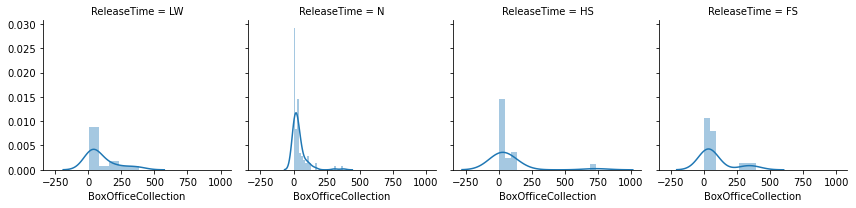

In [199]:
g = sns.FacetGrid(df, col = "ReleaseTime")
g.map(sns.distplot,"BoxOfficeCollection")
plt.show()


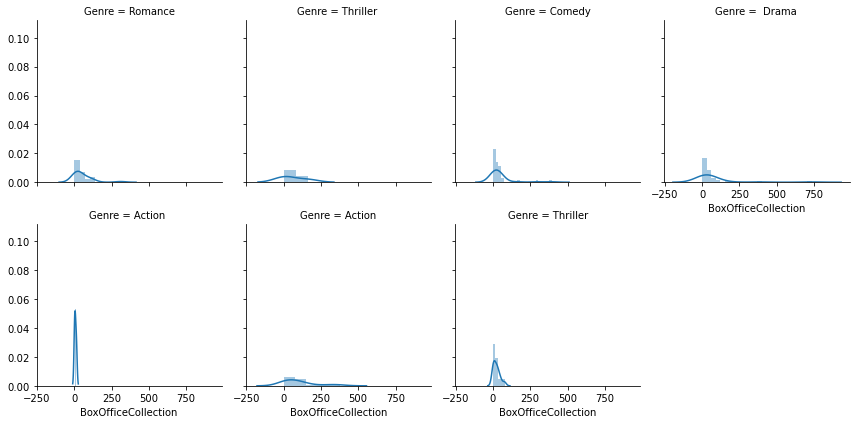

In [200]:
g = sns.FacetGrid(df, col = "Genre", col_wrap= 4)
g.map(sns.distplot,"BoxOfficeCollection")
plt.show()

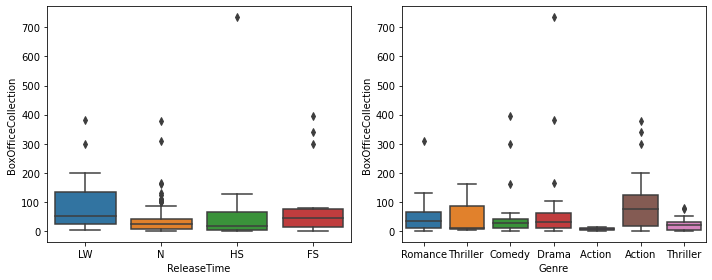

In [201]:
fig, axes = plt.subplots(1,2,figsize = (10,4))


ax = sns.boxplot(df["ReleaseTime"],df["BoxOfficeCollection"], ax = axes[0])


ax = sns.boxplot(df["Genre"],df["BoxOfficeCollection"], ax = axes[1])

plt.tight_layout()


Drama and HS also have a outlier that needs to be inspected. Probably its a movie released in December which is HS and Drama. 

In [202]:
df[df["Month_of_Release"]=="Dec"]

,SlNo,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year_of_Release,Month_of_Release,Day_of_Release
89,90,PK,HS,Drama,85,735.00,13270623,43767,5693,14,Dec,19
91,92,Action Jackson,N,Action,90,57.45,13279636,19240,3859,14,Dec,5


Movie PK is a very strong outlier in the dataset.

In [203]:
'''
Function to remove outliers by addign a column "Z_target" which contains standardised values of target variable. 
Then filters the rows which have z-value >3

'''

def  remove_outliers(data):
    data["Z_target"] = (data["BoxOfficeCollection"]-data["BoxOfficeCollection"].mean())/data["BoxOfficeCollection"].std()
    print("Following records were removed:\n",data[data["Z_target"]>3][["MovieName","BoxOfficeCollection","Z_target"]],"\n","-"*100)
    data = data.drop(data[data["Z_target"]>3].index)
    return data.drop("Z_target",axis = 1)

In [204]:
df = remove_outliers(df)

Following were removed:
            MovieName  BoxOfficeCollection  Z_target
26    Happy New Year                383.0  3.464039
43              Kick                377.0  3.400543
89                PK                735.0  7.189122
92         Bang Bang                340.0  3.008986
115  Chennai Express                395.0  3.591031 
 ----------------------------------------------------------------------------------------------------


In [205]:
df

,SlNo,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year_of_Release,Month_of_Release,Day_of_Release
0,1,2 States,LW,Romance,36,104.00,8576361,26622,2527,14,Apr,18
1,2,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,13,Jan,4
2,3,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,14,Jul,18
3,4,Rajdhani Express,N,Drama,7,0.35,42626,86,19,13,Jan,4
4,5,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,14,Jul,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,15,Feb,27
145,146,NH10,N,Thriller,13,32.10,5592977,15464,1513,15,Mar,13
146,147,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,15,Mar,20
147,148,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,15,Mar,20


In [206]:
df.drop(["SlNo","MovieName","Day_of_Release"], inplace = True, axis = 1)

In [207]:
df = pd.get_dummies(df)
df

,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ReleaseTime_FS,ReleaseTime_HS,ReleaseTime_LW,ReleaseTime_N,Genre_ Drama,...,Month_of_Release_Dec,Month_of_Release_Feb,Month_of_Release_Jan,Month_of_Release_Jul,Month_of_Release_Jun,Month_of_Release_Mar,Month_of_Release_May,Month_of_Release_Nov,Month_of_Release_Oct,Month_of_Release_Sep
0,36,104.00,8576361,26622,2527,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,12.00,1087320,1129,137,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,10,4.00,572336,586,54,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,7,0.35,42626,86,19,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,18,10.80,3113427,4512,1224,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,15,30.00,3250917,8185,615,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
145,13,32.10,5592977,15464,1513,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
146,32,12.00,2316047,4289,807,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
147,5,11.89,4674795,3706,762,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X = df.drop("BoxOfficeCollection", axis = 1)
y = df["BoxOfficeCollection"]

In [210]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [211]:

dec_tree  = DecisionTreeRegressor()
randomForest = RandomForestRegressor()
lin_reg  = LinearRegression()
svr  = SVR()


In [212]:
models = [dec_tree, randomForest, lin_reg, svr]
for model in models:
    print(model)
    print("neg_root_mean_squared_error:"  ,cross_val_score(model,X,y,cv =15 ,scoring='neg_root_mean_squared_error').mean())
    print("-" * 100)

DecisionTreeRegressor()
neg_root_mean_squared_error: -54.09999874105141
----------------------------------------------------------------------------------------------------
RandomForestRegressor()
neg_root_mean_squared_error: -41.88691304246983
----------------------------------------------------------------------------------------------------
LinearRegression()
neg_root_mean_squared_error: -39.84961296018794
----------------------------------------------------------------------------------------------------
SVR()
neg_root_mean_squared_error: -48.10344334071056
----------------------------------------------------------------------------------------------------


In [213]:
df["BoxOfficeCollection"].std()

54.65635911817734

In [214]:
rmse = []
for model in models:
    rmse = []
    print("\n",model)
    for i in range(0,20):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
            model.fit(X_train,y_train)
            rmse.append(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
    print(np.mean(rmse))
    #         print(model,"\n" ,np.sqrt(mean_squared_error(y_test,model.predict(X_test))),"\n")


 DecisionTreeRegressor()
61.56994861790123

 RandomForestRegressor()
44.669042364860964

 LinearRegression()
44.28686726105515

 SVR()
49.21055994383252


89.32612367035988